In [25]:
# define width of gaussian (in units of cell size)
width=0.1

In [26]:
# define a gaussian model
from matplotlib import pyplot as plt
import numpy as np
from math import sqrt, pi

def gaussian(x,mu=0,sigma=1):
    return 1./(sqrt(2*pi)*sigma) * np.exp( -((x-mu)/sigma)**2/2. )

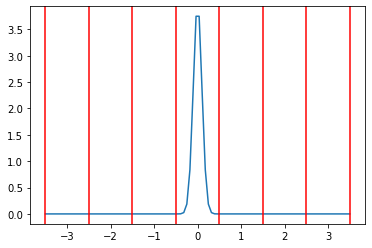

In [27]:
# plot the model and the cell grid
x = np.linspace(-3.5, 3.5, 100)
plt.plot(x, gaussian(x,0,width))

boundaries = [ -3.5+i for i in range(0,8) ]
for b in boundaries:
    plt.axvline(x=b, color='r')

plt.show()

In [28]:
# calculate cluster barycenter from weighted mean of cell centers
# weights proportional to energy integrated in each cell
from scipy.integrate import trapz

def clusterBary(rTrue=0,sigma=0.5):
    cells = [-3,-2,-1.,0.,1.,2.,3]
    etot = 0
    xave = 0
    norm = 0
    for c in cells:
        xi = np.linspace(c-0.5, c+0.5, 100)
        ci = gaussian(xi, rTrue, sigma)
        ei = trapz(ci, xi)
        etot += ei 
        xave += c * ei
    xave /= etot
    return xave

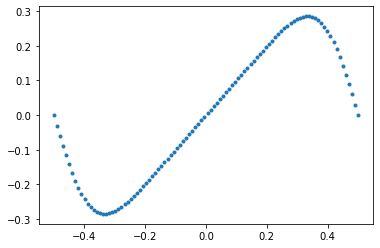

In [29]:
# use the previous functions to calculate and plot the s-curve
# ri is the position of the particle
# ci is the cluster barycenter
ri = np.linspace(-0.5, 0.5, 100)
ci = np.array([clusterBary(r,width) for r in ri])

plt.scatter(ri,ci-ri,marker=".")